# Flowers Image Detection using OpenCV,Tensorflow and Keras

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flower-image-dataset/flowers/gardenias_00060.jpg
/kaggle/input/flower-image-dataset/flowers/peonies_00054.jpg
/kaggle/input/flower-image-dataset/flowers/peonies_00030.jpg
/kaggle/input/flower-image-dataset/flowers/orchids_00053.jpg
/kaggle/input/flower-image-dataset/flowers/gardenias_00047.jpg
/kaggle/input/flower-image-dataset/flowers/peonies_00064.jpg
/kaggle/input/flower-image-dataset/flowers/daisies_00073.jpg
/kaggle/input/flower-image-dataset/flowers/daisies_00019.jpg
/kaggle/input/flower-image-dataset/flowers/gardenias_00007.jpg
/kaggle/input/flower-image-dataset/flowers/garden_roses_00007.jpg
/kaggle/input/flower-image-dataset/flowers/hibiscus_00012.jpg
/kaggle/input/flower-image-dataset/flowers/lilies_00079.jpg
/kaggle/input/flower-image-dataset/flowers/garden_roses_00057.jpg
/kaggle/input/flower-image-dataset/flowers/tulip_00056.jpg
/kaggle/input/flower-image-dataset/flowers/peonies_00077.jpg
/kaggle/input/flower-image-dataset/flowers/lilies_00028.jpg
/kaggle/inp

### Importing the necessary libraries and functions

In [2]:
!pip install tensorflow keras split-folders opencv-python

In [3]:
#import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import splitfolders
import cv2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import layers,models

2025-08-25 17:40:52.102573: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756143652.337277      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756143652.401910      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### In the dataset, the images of flowers of different categories (considering 9 different flowers) are saved inside a single folder named 'flowers'. This is might make it difficult to create a flower image detection system. So I sorted each flower in different folder and named the folders from the names extracted from the flowers image.   

In [4]:
import os
import shutil

exclude_folder = "garden"

source_path='/kaggle/input/flower-image-dataset/flowers'

des_path='/kaggle/working/flowers'

os.makedirs(des_path, exist_ok=True)

#looping through all the files and organizing them into sub-folders
for filename in os.listdir(source_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        #extracting the flower names from the file name
        flower_name=filename.split('_')[0]

        if flower_name == exclude_folder:
            continue

        #creating the sub-folders
        flower_folder=os.path.join(des_path,flower_name)
        os.makedirs(flower_folder,exist_ok=True)

        #moving the images into resp folders
        src_file=os.path.join(source_path,filename)
        dst_file=os.path.join(flower_folder,filename)
        shutil.copy(src_file,dst_file)

### To retreive what are the contents that are available in our dataset after sorting and categorizing.

In [5]:
import os

des_path = '/kaggle/working/flowers'

print("Contents of /kaggle/working/flower:")
print(os.listdir(des_path))

Contents of /kaggle/working/flower:
['hydrangeas', 'hibiscus', 'peonies', 'orchids', 'daisies', 'tulip', 'bougainvillea', 'gardenias', 'lilies']


In [6]:
input_folder='/kaggle/working/flowers'
output_folder='/kaggle/working/Dataset'

split_ratio=(0.8,0.1,0.1)

splitfolders.ratio(
input_folder,
output=output_folder,
seed=300,
ratio=split_ratio,
group_prefix=None
)

Copying files: 659 files [00:00, 1042.06 files/s]


### Spliting the dataset into 3 parts such as training set, validation set and test set.

In [7]:
#Defining the parameters

img_size=(224,224)
batch_size=32

train_datagen=ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [8]:
#Data augmentation for test data
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

#Data augmentation for validation data
valid_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [9]:
train_dir=os.path.join(output_folder,'train')
val_dir=os.path.join(output_folder,'val')
test_dir=os.path.join(output_folder,'test')


train_data= train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_data= valid_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data= test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 524 images belonging to 9 classes.
Found 63 images belonging to 9 classes.
Found 72 images belonging to 9 classes.


#### To retrieve a random image and take a look at the image we have in our dataset.

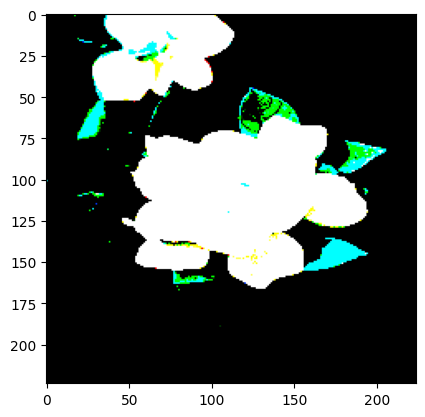

In [11]:
import random
#to view a random image

images,labels=next(val_data)

idx=random.randint(0,images.shape[0]-1)

plt.imshow(images[idx])
plt.show()

#### To check if any one of the flower category is unbalanced when compared to other categories. After checking it seems we have balanced dataset having good amount of flower images in each category as needed to build the image detection system

In [15]:
import os

base_dir = '/kaggle/working/Dataset/train'
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    if os.path.isdir(class_path):
        count = len(os.listdir(class_path))
        print(f"{class_name}: {count} images")

hydrangeas: 48 images
hibiscus: 59 images
peonies: 60 images
orchids: 51 images
daisies: 66 images
tulip: 56 images
bougainvillea: 59 images
gardenias: 61 images
lilies: 64 images


#### We use ResNet50 to create the image detection system 

In [17]:
from keras.applications.resnet import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size[0],img_size[1], 3))
base_model.trainable = False

In [22]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(9, activation='softmax')
])

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - accuracy: 0.2919 - loss: 2.2958 - val_accuracy: 0.8730 - val_loss: 0.5282
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.7282 - loss: 0.8050 - val_accuracy: 0.9206 - val_loss: 0.2406
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.8451 - loss: 0.4814 - val_accuracy: 0.9524 - val_loss: 0.1421
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.8794 - loss: 0.3729 - val_accuracy: 0.9365 - val_loss: 0.1083
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.9011 - loss: 0.2947 - val_accuracy: 0.9841 - val_loss: 0.1133
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.9261 - loss: 0.2876 - val_accuracy: 0.9683 - val_loss: 0.0996
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.9177 - loss: 0.2376 - val_accuracy: 0.9683 - val_loss: 0.0945
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.9278 - loss: 0.2524 - val_accuracy: 0.9841 - val_loss:

#### After model fit, the test accuracy is shown to be 93%

In [25]:
test_loss,test_accuracy=model.evaluate(test_data)

print(test_accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9536 - loss: 0.1652
0.9305555820465088


#### This is one of the most important step as the image detection model needs the class names that it should predict. The assignment of the class names is important, if mixed or the order is changed then the model might predict wrong flower name every time even though the model is good. 

In [77]:
class_name={'bougainvillea': 0, 
 'daisies': 1, 
 'gardenias': 2, 
 'hibiscus': 3, 
 'hydrangeas': 4, 
 'lilies': 5, 
 'orchids': 6, 
 'peonies': 7, 
 'tulip': 8}

class_names = {v: k for k, v in class_names.items()}

In [78]:
def predict_img(image,model):
    test_img=cv2.imread(image)
    test_img=cv2.resize(test_img,(224,224)) 
    test_img=np.expand_dims(test_img,axis=0)
    result=model.predict(test_img)
    r=np.argmax(result)
    print(class_names[r])

#### Testing whether our model predicts the correct flower name

In [80]:
predict_img('/kaggle/working/flowers/hibiscus/hibiscus_00038.jpg', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
hibiscus


In [81]:
model.save('flowers.keras')

## Bonus points

#### In order to test whether our model indeed predicts the right flower name, we must first get the necessary file name from the dataset. 

In [33]:
import os

for root, dirs, files in os.walk('/kaggle/working/Dataset/test/tulip'):
    for file in files:
        print(file)

tulip_00083.jpg
tulip_00074.jpg
tulip_00023.jpg
tulip_00064.jpg
tulip_00002.jpg
tulip_00022.jpg
tulip_00053.jpg
tulip_00052.jpg


#### To get the class_indices

In [67]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()
generator = datagen.flow_from_directory(
    '/kaggle/working/flowers/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

print(generator.class_indices)


Found 659 images belonging to 9 classes.
{'bougainvillea': 0, 'daisies': 1, 'gardenias': 2, 'hibiscus': 3, 'hydrangeas': 4, 'lilies': 5, 'orchids': 6, 'peonies': 7, 'tulip': 8}


#### Checking the contents of the dataset and ensuring whether the images are saved in the correct folder.

In [38]:
import os

des_path = '/kaggle/working/flowers'
for folder_name in os.listdir(des_path):
    folder_path = os.path.join(des_path, folder_name)
    if os.path.isdir(folder_path):
        print(f"\n Folder: {folder_name}")
        for image_file in os.listdir(folder_path):
            print(f"  - {image_file}")


 Folder: hydrangeas
  - hydrangeas_00044.jpg
  - hydrangeas_00045.jpg
  - hydrangeas_00070.jpg
  - hydrangeas_00004.jpg
  - hydrangeas_00002.jpg
  - hydrangeas_00061.jpg
  - hydrangeas_00032.jpg
  - hydrangeas_00071.jpg
  - hydrangeas_00056.jpg
  - hydrangeas_00043.jpg
  - hydrangeas_00034.jpg
  - hydrangeas_00064.jpg
  - hydrangeas_00027.jpg
  - hydrangeas_00049.jpg
  - hydrangeas_00024.jpg
  - hydrangeas_00003.jpg
  - hydrangeas_00033.jpg
  - hydrangeas_00066.jpg
  - hydrangeas_00009.jpg
  - hydrangeas_00021.jpg
  - hydrangeas_00008.jpg
  - hydrangeas_00031.jpg
  - hydrangeas_00046.jpg
  - hydrangeas_00035.jpg
  - hydrangeas_00063.jpg
  - hydrangeas_00026.jpg
  - hydrangeas_00005.jpg
  - hydrangeas_00069.jpg
  - hydrangeas_00040.jpg
  - hydrangeas_00015.jpg
  - hydrangeas_00013.jpg
  - hydrangeas_00022.jpg
  - hydrangeas_00036.jpg
  - hydrangeas_00012.jpg
  - hydrangeas_00016.jpg
  - hydrangeas_00028.jpg
  - hydrangeas_00057.jpg
  - hydrangeas_00020.jpg
  - hydrangeas_00067.jpg
  - 